## Analysis/Problem Statememnt

This dataset contains 114,000 Spotify songs with details on the structure of the song.

The objective of this project is to cluster the data by attributes of a song to give the user the opportunity to select a playlist of curated songs based off the similar structure of the grouped songs

In [85]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


In [96]:
#Import data
data = pd.read_csv("/Users/alyssafroment/Desktop/Relevant Projects/Post Grad Personal Projects/Song Structure/spotify_dataset.csv")
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Exploratory Data Analysis

In [97]:
#Drop unneeded columns
data=data.drop(columns=["Unnamed: 0","track_id"])
data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [98]:
#Fix column types
data['explicit']=data['explicit'].astype(int)

In [99]:
#Check for missing values
data.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [100]:
data[data["artists"].isnull()]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,NaN,NaN,NaN,0,0,0,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [101]:
#only 1 row missing name so we can drop the row as it wont effect the project outcome (wont be focusing on artist name, album name, or track name)
data=data.drop(index=65900)


In [102]:
# Show all rows that are completely duplicated
duplicate_rows = data[data.duplicated(keep=False)]
duplicate_rows

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1874,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,0,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
1925,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,0,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2044,The Killers;Ryan Pardey,Alternative Christmas 2022,Don't Shoot Me Santa,0,245106,0,0.588,0.847,8,-4.164,1,0.0705,0.060100,0.000000,0.3070,0.662,120.041,4,alt-rock
2046,The Killers;Ryan Pardey,Alternative Christmas 2022,Don't Shoot Me Santa,0,245106,0,0.588,0.847,8,-4.164,1,0.0705,0.060100,0.000000,0.3070,0.662,120.041,4,alt-rock
2082,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,0,0.165,0.434,0,-8.163,1,0.0288,0.316000,0.171000,0.2130,0.186,77.983,3,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112968,Acil Servis,Küçük Adam,Bebek,38,319933,0,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish
113295,Matt Redman,Sing Like Never Before: The Essential Collection,Our God - New Recording,34,265373,0,0.487,0.895,11,-5.061,1,0.0413,0.000183,0.000000,0.3590,0.384,105.021,4,world-music
113345,Matt Redman,Sing Like Never Before: The Essential Collection,Our God - New Recording,34,265373,0,0.487,0.895,11,-5.061,1,0.0413,0.000183,0.000000,0.3590,0.384,105.021,4,world-music
113881,Bryan & Katie Torwalt,I've Got Good News (Live) [Deluxe],Good News - Live,23,266632,0,0.473,0.474,6,-9.175,1,0.0558,0.395000,0.000000,0.1630,0.251,140.746,4,world-music


In [103]:
#Keep first occurance and drop the duplicated versions
data = data.drop_duplicates(keep='first')
data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [104]:
# Checking max and min of all numeric features to ensure there is no values outside assigned ranges
cols = ['popularity','duration_ms','danceability', 'energy', 'key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']

for col in cols:
    print(f"{col} - Min: {data[col].min()}, Max: {data[col].max()}")

#Features that need more examining: duration_ms, time_signature

popularity - Min: 0, Max: 100
duration_ms - Min: 8586, Max: 5237295
danceability - Min: 0.0, Max: 0.985
energy - Min: 0.0, Max: 1.0
key - Min: 0, Max: 11
loudness - Min: -49.531, Max: 4.532
mode - Min: 0, Max: 1
speechiness - Min: 0.0, Max: 0.965
acousticness - Min: 0.0, Max: 0.996
instrumentalness - Min: 0.0, Max: 1.0
liveness - Min: 0.0, Max: 1.0
valence - Min: 0.0, Max: 0.995
tempo - Min: 0.0, Max: 243.372
time_signature - Min: 0, Max: 5


In [105]:
#duration_ms - Min: 8586, Max: 5237295

#8 seconds and 87 minutes is very atypical of a song, could be an intro song to an album thats 8 seconds and 87 minuutes could be an audio book or whole album
#This project is to optimize user enjoyment for song listening so I will filter only typical song lengths 

# Keep only rows where duration is between 1 min and 15 min
data = data[(data['duration_ms'] >= 60000) & (data['duration_ms'] <= 900000)]

In [106]:
#time_signature - Min: 0, Max: 5

#Songs are typically between 3-5 time signature and is rare to have anything outside of that
#After investigating we see 154 songs with time signature 0 and 903 songs wiht time signature 1
#Time signature 0 is not possible becuase that technically means there is no beats per bar
#Typically I would remove this as it is technically  an error, however I understand the data I am working with and recognize what that "supposed" error means
#Being familiar with songs on Spotify there are all kinds of music for example rain sounds, ocean waves, brown noise, etc.
#These songs are very popular that people use as background noise that have no beats which explains the invalid time signature
#These songs are important to keep and to recognize how they are being recorded in the dataset

#After some research there is such thing as time signature 1 which is 1 beat per bar
#After reseraching a few songs in this dataset that are listed under time signature 1, the rare time signature lines up with my research
#Therefore these aren't errors
print(f"# of songs with Time Signature 0: {data[data['time_signature'] == 0].shape[0]}")
print(f"# of songs with Time Signature 1: {data[data['time_signature'] == 1].shape[0]}")
print(f"# of songs with Time Signature 2: {data[data['time_signature'] == 2].shape[0]}")
print(f"# of songs with Time Signature >5: {data[data['time_signature'] >5].shape[0]}")

# of songs with Time Signature 0: 154
# of songs with Time Signature 1: 903
# of songs with Time Signature 2: 0
# of songs with Time Signature >5: 0


## Data Preprocessing
Feature Selection, Feature Scaling, Dimensionality Reduction

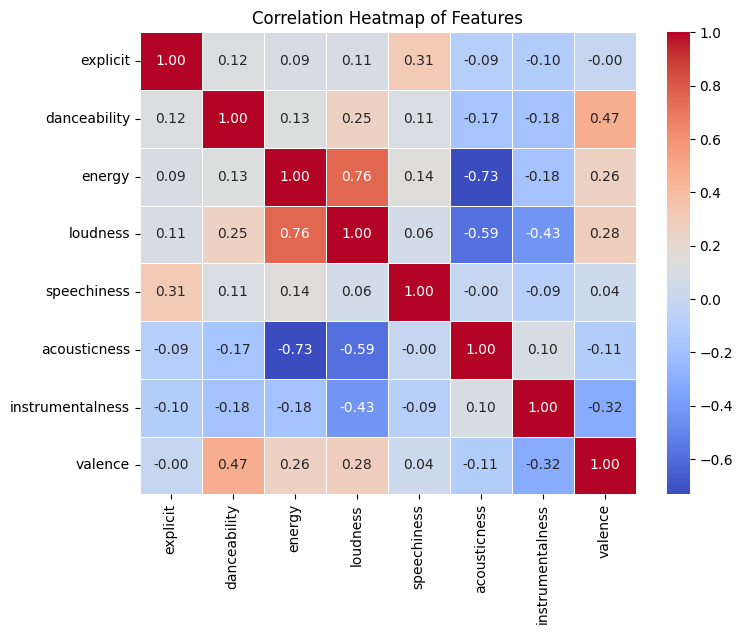

In [107]:
#Feature Selection
#Dropping any columns that are about labelling the song and is not the actual makeup of the song itself ('artists','album_name','track_name','track_genre')
#After research and testing/rerunning the model and then evaluating using Silhouette score and Elbow testing, I have dropped features that arent used to help clustering and is proven to only add noise
#Additionally some columns (such as liveness) show similar averaged values across all clusters which indicates its not helping seperation and can be dropped

clustering = data.drop(columns=['artists','album_name','track_name','track_genre','duration_ms','mode','time_signature','popularity','key','tempo','liveness'])

#Checking for multicollinearity
correlation_matrix=clustering.corr()
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()
#Results show nothing is overly correlated (max is 76% which is not identical features)

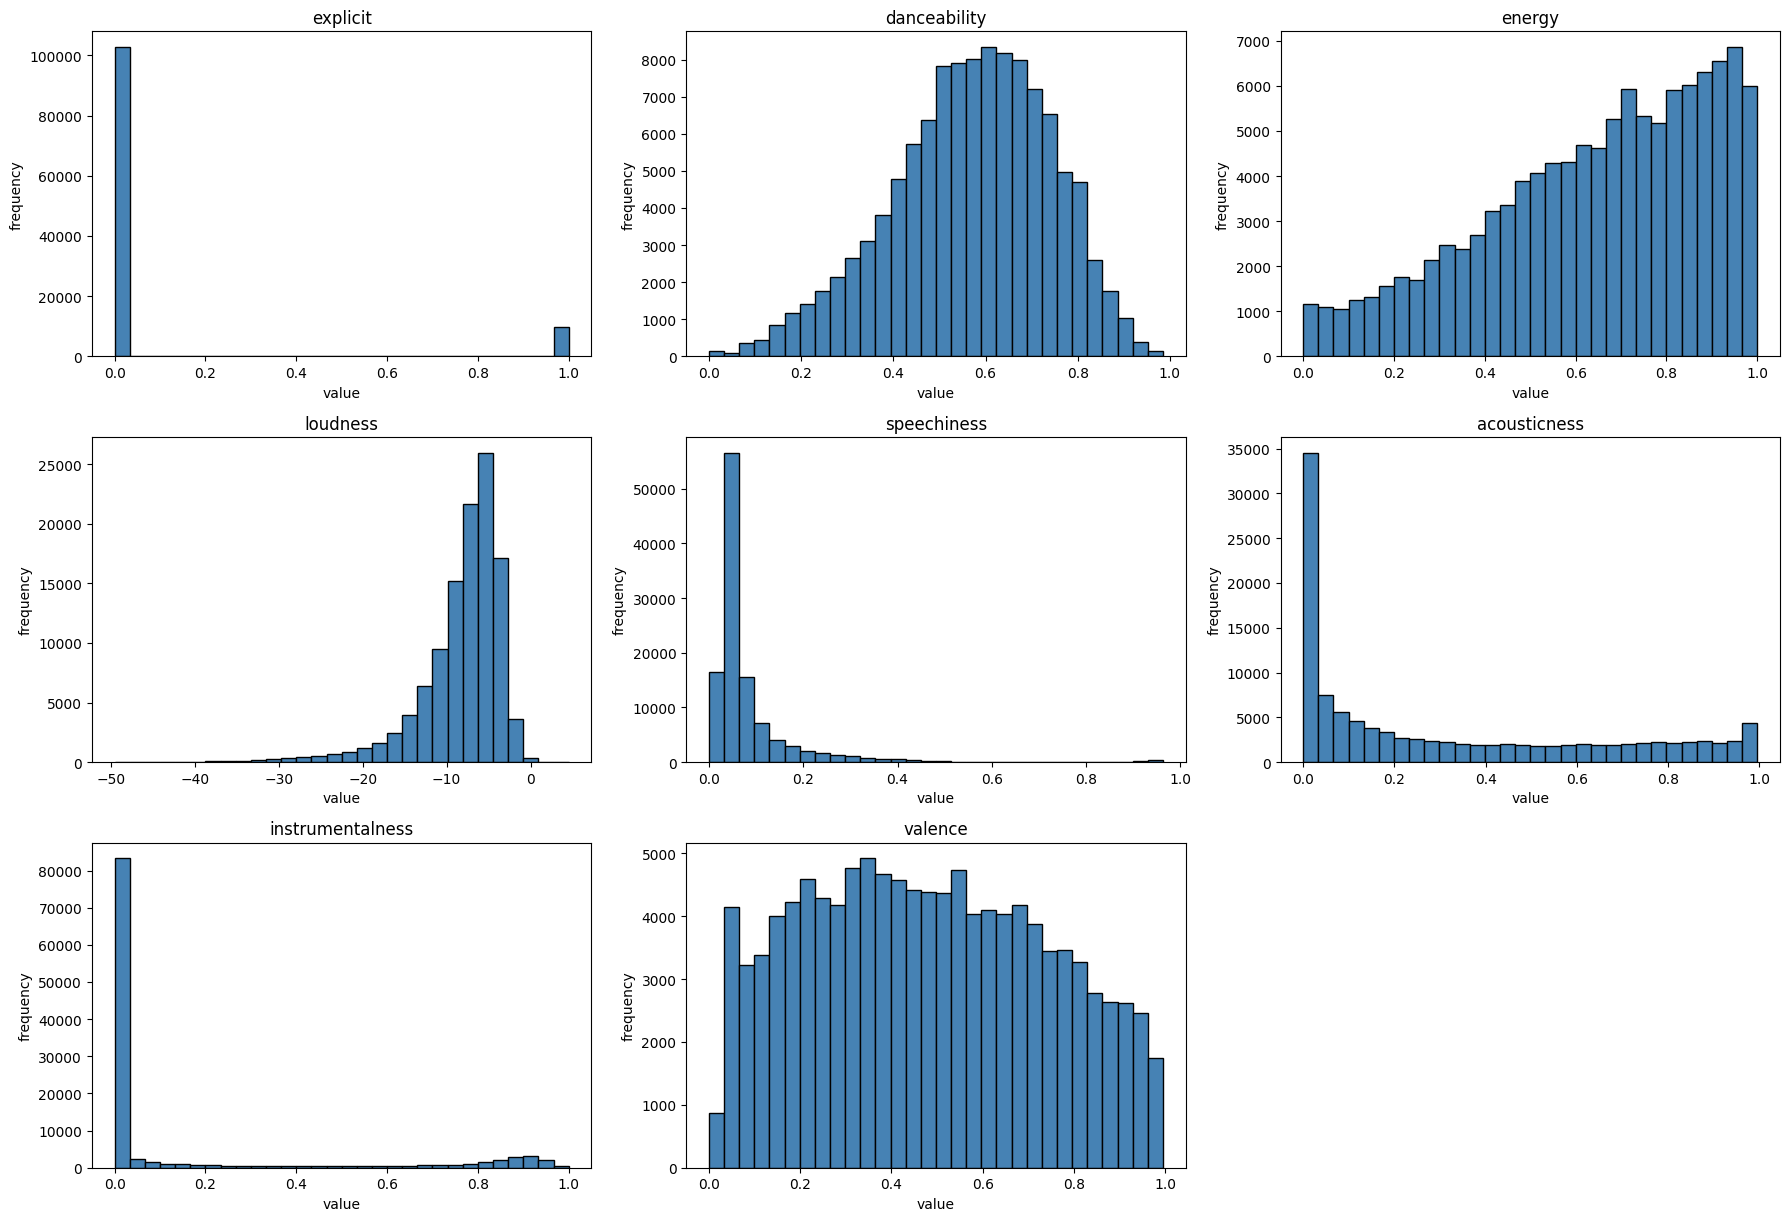

In [108]:
#Feature Scalling

#Features are all on different scales such as popularity (0-100) and danceability (0-1)
#This ensures each feature contributes equally to the distance calculations
#Without scaling, a feature with a larger range of values (popularity) would disproportionately influence the distance metric, potential skewed results.

#First is to determine if I need to use StandardScaler or MinMaxScaler to scale
#Use StandardScaler if data is normal (bell shaped), use MinMaxScaler if data is skewed
#Use a combination of both if the features are half and half normal and skewed
numeric_cols = clustering.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(18, 20))

#enumerate is like a for loop except it adds the index to each value
#this is used in this example to number each column to loop through to fill the graph layout
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 3, i)
    plt.hist(clustering[col], bins=30, color='steelblue', edgecolor='black')
    plt.title(col, fontsize=12)
    plt.xlabel("value")
    plt.ylabel("frequency")

plt.tight_layout()
plt.show()

#Results show 2/15 features are normal (danceability, tempo) so majority are skewed I will standardize using MinMaxScaler (this preserves the features pattern)


In [109]:
#Scalling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(clustering[numeric_cols])

scaled = pd.DataFrame(scaled_data, columns=numeric_cols)
scaled

,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence
0,0.0,0.686294,0.4610,0.791392,0.148494,0.032329,0.000001,0.718593
1,0.0,0.426396,0.1660,0.597377,0.079232,0.927711,0.000006,0.268342
2,0.0,0.444670,0.3590,0.736123,0.057840,0.210843,0.000000,0.120603
3,0.0,0.270051,0.0596,0.573701,0.037695,0.908635,0.000071,0.143719
4,0.0,0.627411,0.4430,0.737103,0.054621,0.470884,0.000000,0.167839
...,...,...,...,...,...,...,...,...
112432,0.0,0.174619,0.2350,0.612952,0.043821,0.642570,0.928000,0.034070
112433,0.0,0.176650,0.1170,0.577345,0.041641,0.997992,0.976000,0.035176
112434,0.0,0.638579,0.3290,0.714648,0.043614,0.870482,0.000000,0.746734
112435,0.0,0.595939,0.5060,0.714759,0.030841,0.382530,0.000000,0.415075


In [81]:
#Dimensionality Reduction
#PCA(Principle Component Analysis) reduces noise and makes the dataset cleaner however the trade-off is that you lose the original meaning of the individual features
#In this specific project these individual features are needed to determine each cluster genre
#Therefore I am skipping dimensionality reduction

## Clustering

In [110]:
# Initialize K-Means with 5 clusters
#random_state=42 ensures every time i rerun it will produce the same clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit K-Means on scaled data
kmeans.fit(scaled)

# Get cluster labels (this is an array of the results clusters)
cluster_labels = kmeans.labels_

# Adding the cluster labels to the original dataframe for interpretation
clustering['cluster'] = cluster_labels

In [83]:
# How many songs are in each cluster
print(clustering['cluster'].value_counts())


cluster
2    55766
1    27804
4    11820
0     9624
3     7423
Name: count, dtype: int64


In [111]:
# Get the mean of each feature for each cluster
cluster_summary = clustering.groupby('cluster')[numeric_cols].mean()
print(cluster_summary)


         explicit  danceability    energy   loudness  speechiness  \
cluster                                                             
0        1.000000      0.638154  0.720842  -6.463943     0.190577   
1        0.000000      0.542706  0.429145 -10.174784     0.068748   
2        0.000000      0.590655  0.768704  -6.001138     0.080235   
3        0.001482      0.395227  0.211387 -19.411609     0.053744   
4        0.000085      0.572044  0.761885  -8.370314     0.071797   

         acousticness  instrumentalness   valence  
cluster                                            
0            0.211777          0.049340  0.471800  
1            0.697114          0.016812  0.458258  
2            0.116116          0.019111  0.546705  
3            0.865687          0.845983  0.221611  
4            0.070747          0.762898  0.334274  


Results Interpretation

Cluster 0
High explicit (1), high speechiness (0.190577) explicit spoken words more likely than sung vocals (rap, rock)
High energy (0.72), high danceability (0.64), and high loudness (-6.4dB) suggests powerful, rhythmic, energetic songs
Low acousticness (0.2) and low instrumentals (0.05) suggest electronic
Mid valence (0.47) indicates energetic but not overly positive or happy
Overall this music feels: confident, bold, high-impact, action packed
Book Genres this fits: Fantasy, Action, Adventure

Cluster 1
Low explicit (0), Low speechiness (0.069), moderate instrumentalness (0.02) indicate songs with vocal singing not spoken words (such as rap)
Moderate danceability (0.54) suggest not dark somber music but also not party music, more of a stable rhythm
Low-moderate energy (0.43) and low loudness (-10.2dB) suggests softness in the music
High acousticness (0.697) indicate real instruments used (guitar, piano, etc)
Low valence (0.46) indicate heartbreak or emotionally intense
Overall this music feels: vocal driven, real instruments used, softness, emotional, intimate, personal
Book Genres this fits: Romance, Drama

Cluster 2
Low explicit (0), Low speechiness (0.08), very low instrumentals (0.02) confirms vocal singing not spoken words (such as rap)
Mid danceability (0.59), high loudness (-6dB), and high energy (0.77) strong rythmic movement, bright high energy
Low acousticness (0.12) means electronic
Mid valence (0.55) suggests energetic or optimistic tone
Overall this music feels: upbeat, energetic, electronic, futuristic, vibrant
Book Genres this fits: Science Fiction, Adventure

Cluster 3
Low explicit (0), low speechiness (0.05), very high instrumentalness (0.85) all confirms no lyrics and mostly instrumental
Mid Danceability (0.4) and low energy (0.2) indicates moderate rhythm but not dance pop
High acousticness (0.87) and very low loudness (-19.4dB) strongly indicates no natural sounds (such as guitar) and all electrical amplification
Low valence (0.22) indicates it is dark, somber, depressed, or angry music. Features minor keys, atmospheric textures, and slow tempos.
Overall this music feels: instrumental electronic ambient, dark, suspense, cinematic and tension
Book Genres this fits: Thriller/Mystery, Horror, Crime

Cluster 4
Low explicit (0), Mid speechiness (0.07), and high instrumentalness (0.76) suggests electronic instrumental
Danceability mid (0.57), high energy (0.765), mid loudness (-8.4dB) suggests rhythmic and lively music
Low acousticness (0.07) suggests mostly electronic
Mid valence (0.3) suggests energetic or optimistic tone, balanced, moderately upbeat emotional tone.
Overall this music feels: dynamic, lively, cinematic
Book Genres this fits: Historical Fiction

## Visualize Clusters

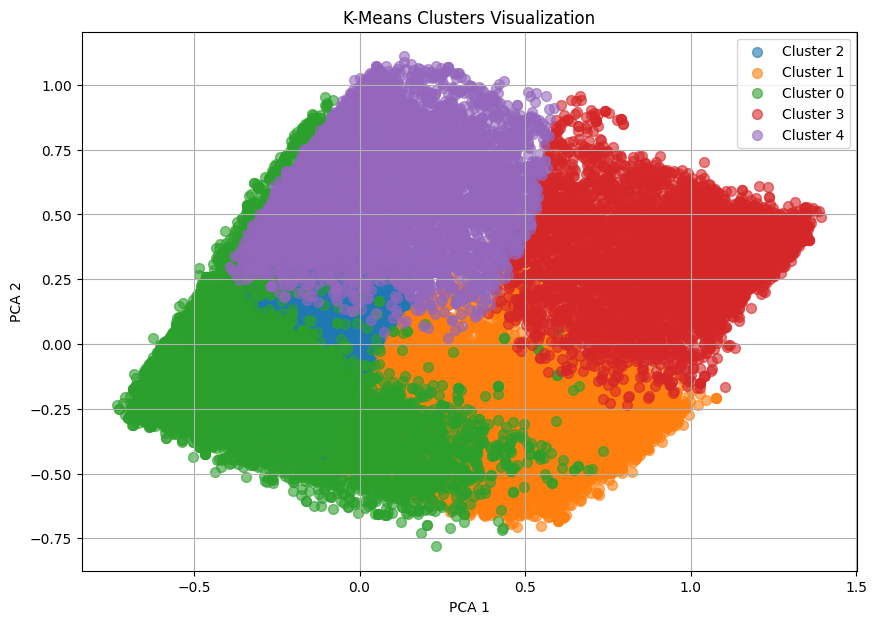

In [112]:
#Applying PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

#Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = clustering['cluster'].values

#Plot the clusters on a graph
plt.figure(figsize=(10, 7))
#for loop loops through the clusters (0,1,2,3,4) to select and plot them all
for cluster in pca_df['cluster'].unique():
    #selects the cluster
    subset = pca_df[pca_df['cluster'] == cluster]
    #pulls the data that is for the current cluster
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', alpha=0.6, s=50)

plt.title('K-Means Clusters Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()


In [113]:
#Cluster Evaluation Metrics
silhouette_avg = silhouette_score(scaled, clustering['cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")
print("K-Means Inertia:", kmeans.inertia_)

Silhouette Score: 0.378
K-Means Inertia: 18762.548180953618


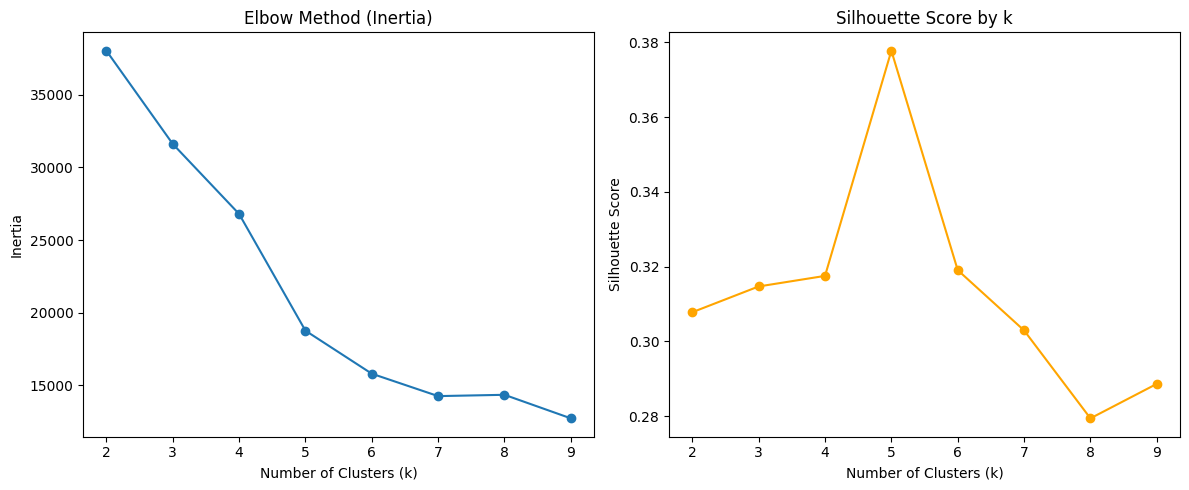

In [114]:
# Evaluate clustering performance for different k values

inertias = []
silhouettes = []
k_values = range(2, 10)  # <-- testing this range of number of clusters 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(scaled, labels))

# Plot the elbow and silhouette methods
plt.figure(figsize=(12,5))

# Elbow Plot
plt.subplot(1,2,1)
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

# Silhouette Plot
plt.subplot(1,2,2)
plt.plot(k_values, silhouettes, marker='o', color='orange')
plt.title("Silhouette Score by k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Results summary (based on the plots)
#Elbow point and silhouette score both suggest k=5 is optimal.
#Low silhouette indicates overlapping song characteristics however that is common in songs

In [115]:
# Finalize KMeans With The Chosen Number of Clusters

kmeans = KMeans(n_clusters=5, random_state=42)
data = data.copy()

# Fit K-Means on scaled data
kmeans.fit(scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to your original dataframe
data['cluster'] = cluster_labels

# Calculate silhouette score for confirmation
silhouette_avg = silhouette_score(scaled, data['cluster'])
print(f"Final Silhouette Score (k=5): {silhouette_avg:.3f}")

# Check number of songs per cluster
#print("\nSongs per cluster:")
#print(data['cluster'].value_counts())

Final Silhouette Score (k=5): 0.378


In [117]:
#View Top X Songs Closest To Each Clusters Centre

# Copy the original data for labeling and distance calculations
df = data.copy()

# Calculate distances of each song to its assigned cluster centroid
#THis line computes the distance from every song to every cluster centre
distances = pairwise_distances(scaled, kmeans.cluster_centers_)
#add assigned cluster labels (0,1,2,3,4) to each song
df['cluster'] = kmeans.labels_
#For each song, take the distance to the cluster it actually belongs to and store it in a new column distance_to_centroid.
# Create an empty list to store distances
distance_list = []

# Loop over each song by index
for i in range(len(df)):
    # Get the cluster label assigned to this song
    label = df['cluster'].iloc[i]
    
    # Get the distance from this song to its assigned cluster centroid
    distance = distances[i, label]
    
    # Add it to the list
    distance_list.append(distance)

# Assign the list as a new column in the DataFrame
df['distance_to_centroid'] = distance_list


# Select top 50 songs per cluster (closest to centroid)
top_songs = (
    df.sort_values('distance_to_centroid')
      .groupby('cluster')
      .head(50)
      .reset_index(drop=True)
)

# Display top songs for each cluster
for c in sorted(top_songs['cluster'].unique()):
    print(f"\nCluster {c} Top Songs:")
    print(
        top_songs[top_songs['cluster'] == c][
            ['artists', 'track_name', 'distance_to_centroid']
        ].to_string(index=False)
    )


Cluster 0 Top Songs:
                                                 artists                                                              track_name  distance_to_centroid
                                       Mr Eazi;Burna Boy                                                            Miss You Bad              0.093010
                                The Notorious B.I.G.;112                             Sky's the Limit (feat. 112) - 2014 Remaster              0.094791
                                               Fetty Wap                                                                 Wake Up              0.098904
                            DJ MAVICC;DJ KS;DJ RD DA DZ7                                                     AUTOMOTIVO PARALELO              0.103224
                                               Mora;Sech                                                            TUS LÁGRIMAS              0.104825
                                                  Motive                